# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
np.random.seed(10)

In [2]:
print(DEVICE)

mps


# Training Data

[   DISTANCE  TIME
1    0.0125  2.33
2    0.0100  0.77
3    0.0075  0.31
4    0.0050  0.08
5    0.0025  0.03
6    0.0000  0.00,    DISTANCE   TIME
4    0.0125  0.295
5    0.0100  0.120
6    0.0050  0.020
7    0.0000  0.000,    DISTANCE  TIME
4    0.0125  0.19
5    0.0100  0.08
6    0.0050  0.00
7    0.0000  0.00,    DISTANCE  TIME
4    0.0125  0.10
5    0.0100  0.04
6    0.0050  0.00
7    0.0000  0.00]


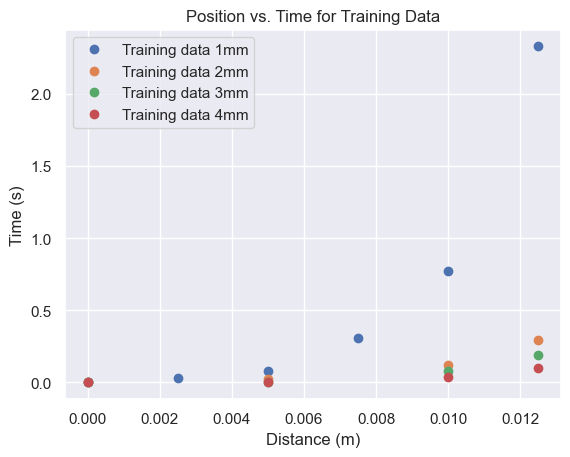

In [3]:
# Grab training data
train, test = grab_training_data(real = True)
print(train)

# Define legends for dimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(train)):
        plt.plot(train[i]['DISTANCE'], train[i]['TIME'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Time (s)')
    plt.xlabel('Distance (m)')
    plt.title('Position vs. Time for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

# Run the Model

Losses for 1mm droplet:
Epoch 1/60000, total loss: 147019920.0
Epoch 2/60000, total loss: 147019728.0
Epoch 3/60000, total loss: 147019552.0
Epoch 4/60000, total loss: 147019360.0
Epoch 5/60000, total loss: 147019120.0
Epoch 6/60000, total loss: 147018832.0
Epoch 7/60000, total loss: 147018512.0
Epoch 8/60000, total loss: 147018112.0
Epoch 9/60000, total loss: 147017664.0
Epoch 10/60000, total loss: 147017104.0
Epoch 6000/60000, total loss: 262340.71875
Epoch 12000/60000, total loss: 838854.6875
Epoch 18000/60000, total loss: 153.38800048828125
Epoch 24000/60000, total loss: 6.269140243530273
Epoch 30000/60000, total loss: 22488.8125
Epoch 36000/60000, total loss: 115.50212097167969
Epoch 42000/60000, total loss: 71.07760620117188
Epoch 48000/60000, total loss: 91.42008209228516
Epoch 54000/60000, total loss: 1510801.5
Epoch 60000/60000, total loss: 9622.814453125



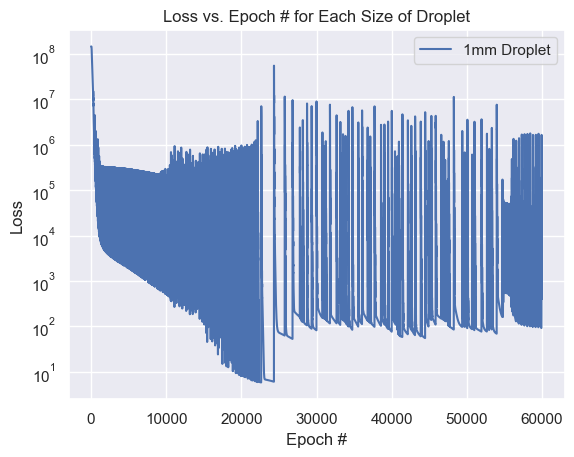

In [4]:
plt.yscale('log')
different_droplet_networks = [None] * len(train)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
# for i in range(0, len(different_droplet_networks)):
for i in range(0, 1):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_dim, epochs=60000, loss1_weight=1, loss2_weight=1, lr=8*1e-4, batch_size=8).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(train[i]['DISTANCE']), np.array(train[i]['TIME']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

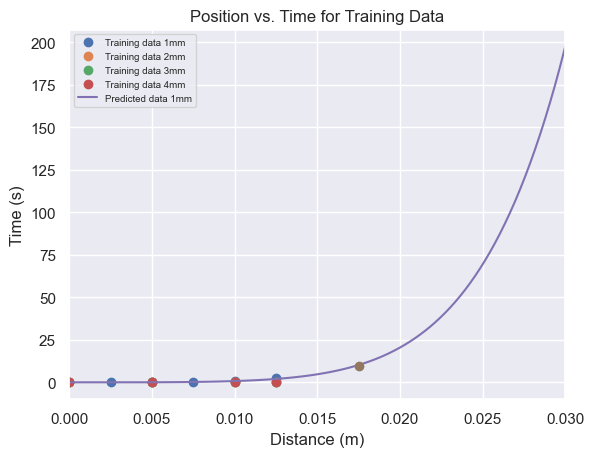

In [5]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
xs = np.linspace(0, 0.03, 100)

# Plot dimensionalized model
# for i in range(0, len(different_droplet_networks)):
for i in range(0, 1):
    preds = different_droplet_networks[i].predict(xs)
    plt.plot(xs, preds)
    plt.plot(test[i]['DISTANCE'], test[i]['TIME'], 'o')
    dim_legend.append(f'Predicted data {i+1}mm')
plt.xlim(0, 0.03)
plt.legend(dim_legend, fontsize=7)
plt.show()



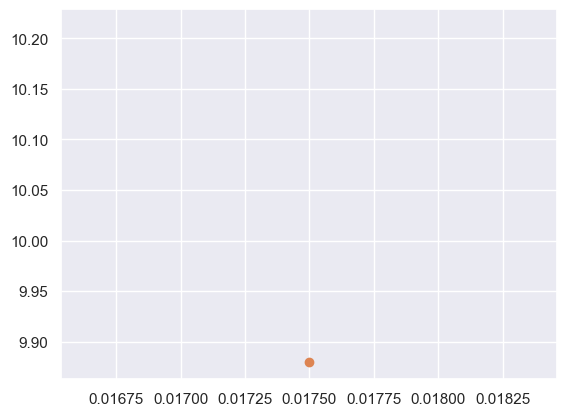

[[-0.33218872]]


In [6]:
pred_distances = test[0]['DISTANCE']
pred_distances = np.array(pred_distances)
pred_times = different_droplet_networks[0].predict(pred_distances)
plt.plot(pred_distances, pred_times)
plt.plot(test[0]['DISTANCE'], test[0]['TIME'], 'o')
plt.show()
print(np.array(test[0]['TIME']) - pred_times)